# Librerías usadas

In [1]:
import serial
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import re
import cv2
from scipy.optimize import curve_fit

$
w(n)=\left\lbrace\begin{array}{ll}
\begin{array}{c}
0.42-0.5\cos\left(\dfrac{2\pi n}{M-1}\right) \\ 
+0.08\cos\left(\dfrac{4\pi n}{M-1}\right)
\end{array}, & 0\leq n \leq M-1 \\
0, & \operatorname{otros}
\end{array}\right.
$

# Adquicisión de datos

## Puetro serial

Adquicisión de datos simple, para una sola muestra, donde se realiza una lectura y luego se cierra el puerto serial, presentado el valor leído.

In [2]:
arduino = serial.Serial('COM3', 9600)
time.sleep(2)
rawString = arduino.readline()
print(rawString)
arduino.close()

b'EL VARLOR ES: 1  voltaje es:  0.02\r\n'


### N - muestras
Adquiere datos para un número $n$ determinado de muestras obtenidas con un tiempo de muestreo $t_s$ expresado en segundos.

In [2]:
t=1
n=10
arduino = serial.Serial('COM3', 9600)
lista = []
#data = np.zeros((2,n),dtype='float')
for i in range(n):
    lista.append(arduino.readline().decode("utf-8"))
    time.sleep(t)
print(lista)
arduino.close()

['0,0,0.00,-0.11\r\n', '0,0,0.00,-0.19\r\n', '28,65,0.00,-0.11\r\n', '28,65,0.00,-0.11\r\n', '28,65,0.00,-0.11\r\n', '28,65,0.00,-0.04\r\n', '28,65,0.00,-0.04\r\n', '28,65,0.00,-0.11\r\n', '28,65,0.00,-0.04\r\n', '28,65,0.00,-0.11\r\n']


In [3]:
DATAadq = pd.DataFrame(np.zeros((len(lista),4)),columns=['Temperature(°C)','Humedad(%)','Voltage(V)','Current(A)'])
#DATAadq

In [4]:
dataADQ = lista.copy()
for i in range(len(dataADQ)):
    dataADQ[i]=dataADQ[i].split(",")
dataADQ=np.array(dataADQ)
for i in range(len(dataADQ)):
    for j in range(len(dataADQ[i])):
        dataADQ[i,j] = re.sub("\D","",dataADQ[i,j])
DATAadq.update((({'Temperature(°C)':dataADQ[:,0]})))
DATAadq.update((({'Humedad(%)':dataADQ[:,1]})))
DATAadq.update((({'Voltage(V)':dataADQ[:,2]})))
DATAadq.update((({'Current(A)':dataADQ[:,3]})))
DATAadq


,Temperature(°C),Humedad(%),Voltage(V),Current(A)
0,0,0,000,011
1,0,0,000,019
2,28,65,000,011
3,28,65,000,011
4,28,65,000,011
5,28,65,000,004
6,28,65,000,004
7,28,65,000,011
8,28,65,000,004
9,28,65,000,011


In [142]:
dataADQ

array([['0', '0', '039', '048'],
       ['0', '0', '039', '048'],
       ['29', '64', '039', '056'],
       ['29', '64', '039', '048'],
       ['30', '64', '039', '056'],
       ['30', '64', '039', '056'],
       ['30', '64', '039', '048'],
       ['30', '64', '039', '056'],
       ['29', '64', '039', '056'],
       ['29', '64', '039', '048']], dtype='<U6')

## Experimentos para V semana internacional de ciencia y tecnología
En esta sección se realizan 3 experimentos para el póster a presentar en la V semana de Ciencia y tecnología, el cual se divulga el día 23 de de noviembre en un horario 9-11:30hs GTM 05 Colombia

In [13]:
t = 1
n1 = 60#200
n2 = 60#200
n3 = 60#200
DATAadqEXP1 = pd.DataFrame(np.zeros((n1,4)),columns=['Temperature(°C)','Humedad(%)','Voltage(V)','Current(A)'])
DATAadqEXP2 = pd.DataFrame(np.zeros((n2,4)),columns=['Temperature(°C)','Humedad(%)','Voltage(V)','Current(A)'])
DATAadqEXP3 = pd.DataFrame(np.zeros((n3,4)),columns=['Temperature(°C)','Humedad(%)','Voltage(V)','Current(A)'])

### Experimento 1
60 muestras para un sistema de calefación con características térnicas de fabrica a $100$W.

In [ ]:
n=600#n1
arduino = serial.Serial('COM3', 9600)
lista = []
#data = np.zeros((2,n),dtype='float')
for i in range(n):
    lista.append(arduino.readline().decode("utf-8"))
    time.sleep(t)
print(lista)
arduino.close()
dataADQ = lista.copy()
for i in range(len(dataADQ)):
    dataADQ[i]=dataADQ[i].split(",")
dataADQ=np.array(dataADQ)
for i in range(len(dataADQ)):
    for j in range(len(dataADQ[i])):
        dataADQ[i,j] = re.sub("\D","",dataADQ[i,j])
DATAadqEXP1.update((({'Temperature(°C)':dataADQ[1:200,0]})))
DATAadqEXP1.update((({'Humedad(%)':dataADQ[1:200,1]})))
DATAadqEXP1.update((({'Voltage(V)':dataADQ[1:200,2]})))
DATAadqEXP1.update((({'Current(A)':dataADQ[1:200,3]})))
DATAadqEXP2.update((({'Temperature(°C)':dataADQ[1:200,0]})))
DATAadqEXP2.update((({'Humedad(%)':dataADQ[1:200,1]})))
DATAadqEXP2.update((({'Voltage(V)':dataADQ[1:200,2]})))
DATAadqEXP2.update((({'Current(A)':dataADQ[1:200,3]})))
DATAadqEXP3.update((({'Temperature(°C)':dataADQ[1:200,0]})))
DATAadqEXP3.update((({'Humedad(%)':dataADQ[1:200,1]})))
DATAadqEXP3.update((({'Voltage(V)':dataADQ[1:200,2]})))
DATAadqEXP3.update((({'Current(A)':dataADQ[1:200,3]})))

### Experimento 2
300 muestras para un sistema de calefación con características técnicas de fabrica a $100$W.

In [14]:
n=n2
arduino = serial.Serial('COM3', 9600)
lista = []
#data = np.zeros((2,n),dtype='float')
for i in range(n):
    lista.append(arduino.readline().decode("utf-8"))
    print(arduino.readline().decode("utf-8"))
    time.sleep(t)
print(lista)
arduino.close()
dataADQ = lista.copy()
for i in range(len(dataADQ)):
    dataADQ[i]=dataADQ[i].split(",")
dataADQ=np.array(dataADQ)
for i in range(len(dataADQ)):
    for j in range(len(dataADQ[i])):
        dataADQ[i,j] = re.sub("\D","",dataADQ[i,j])
DATAadqEXP2.update((({'Temperature(°C)':dataADQ[:,0]})))
DATAadqEXP2.update((({'Humedad(%)':dataADQ[:,1]})))
DATAadqEXP2.update((({'Voltage(V)':dataADQ[:,2]})))
DATAadqEXP2.update((({'Current(A)':dataADQ[:,3]})))
#DATAadqEXP = pd.concat([DATAadqEXP1,DATAadqEXP2,DATAadqEXP3],keys=['Experimento 1.','Experimento 2.','Experimento 3.'])
DATAadqEXP2

0,0,12.20,1.52

23,44,12.15,1.59

23,44,12.10,1.59

22,44,12.10,1.59

22,44,12.08,1.44

22,44,12.10,1.52

22,44,12.10,1.52

22,44,12.10,1.52

22,44,12.08,1.67

22,44,12.08,1.59

22,45,12.08,1.52

23,45,12.08,1.67

23,45,12.08,1.67

23,45,12.08,1.59

23,45,12.05,1.67

23,45,12.08,1.59

23,45,12.08,1.67

23,45,12.08,1.59

23,46,12.05,1.67

23,46,12.08,1.59

23,46,12.05,1.67

23,46,12.08,1.59

23,46,12.05,1.74

23,46,12.08,1.67

23,46,12.05,1.74

23,46,12.08,1.67

23,46,12.08,1.74

23,46,12.08,1.74

23,46,12.08,1.59

23,46,12.08,1.74

23,46,12.05,1.74

23,46,12.05,1.67

23,46,12.08,1.74

23,46,12.05,1.89

23,46,12.05,1.74

23,46,12.08,1.59

23,46,12.08,1.74

23,46,12.05,1.67

23,46,12.08,1.67

23,45,12.08,1.67

23,45,12.05,1.59

23,45,12.05,1.81

23,45,12.03,1.81

23,45,12.08,1.67

23,45,12.05,1.74

23,45,12.05,1.67

23,45,12.05,1.67

23,45,12.05,1.74

23,45,12.05,1.59

23,45,12.05,1.74

23,45,12.05,1.81

23,45,12.05,1.81

23,45,12.05,1.74

23,45,12.03,1.81

23,45,12.05,1.81

23,45,12.05,

,Temperature(°C),Humedad(%),Voltage(V),Current(A)
0,0,0,1220,152
1,23,44,1215,159
2,23,44,1213,152
3,22,44,1210,152
4,22,44,1210,159
5,22,44,1210,152
6,22,44,1210,159
7,22,44,1210,152
8,22,44,1208,159
9,22,44,1210,167


In [21]:
arduino.close()

### Experimento 3
600 muestras para un sistema de calefación con características técnicas de fabrica a $100$W.

In [6]:
n=n3
arduino = serial.Serial('COM3', 9600)
lista = []
#data = np.zeros((2,n),dtype='float')
for i in range(n):
    lista.append(arduino.readline().decode("utf-8"))
    time.sleep(t)
print(lista)
arduino.close()
dataADQ = lista.copy()
for i in range(len(dataADQ)):
    dataADQ[i]=dataADQ[i].split(",")
dataADQ=np.array(dataADQ)
for i in range(len(dataADQ)):
    for j in range(len(dataADQ[i])):
        dataADQ[i,j] = re.sub("\D","",dataADQ[i,j])
DATAadqEXP3.update((({'Temperature(°C)':dataADQ[:,0]})))
DATAadqEXP3.update((({'Humedad(%)':dataADQ[:,1]})))
DATAadqEXP3.update((({'Voltage(V)':dataADQ[:,2]})))
DATAadqEXP3.update((({'Current(A)':dataADQ[:,3]})))
DATAadqEXP3

KeyboardInterrupt: 

In [51]:
DATAadqEXP4

,Temperature(°C),Humedad(%),Voltage(V),Current(A)
0,0,0,000,004
1,23,43,1174,418
2,23,43,1166,433
3,23,43,1164,463
4,23,43,1164,470
5,23,43,1161,492
6,23,43,1157,522
7,23,43,1154,529
8,23,43,1152,559
9,23,43,1152,559


### Experimento 4

In [22]:
n=n3
arduino = serial.Serial('COM3', 9600)
lista = []
#data = np.zeros((2,n),dtype='float')
for i in range(60):
    lista.append(arduino.readline().decode("utf-8"))
    print(arduino.readline().decode("utf-8"))
    time.sleep(t)
#print(lista)
arduino.close()
dataADQ = lista.copy()
for i in range(len(dataADQ)):
    dataADQ[i]=dataADQ[i].split(",")
dataADQ=np.array(dataADQ)
for i in range(len(dataADQ)):
    for j in range(len(dataADQ[i])):
        dataADQ[i,j] = re.sub("\D","",dataADQ[i,j])
DATAadqEXP4 = pd.DataFrame(np.zeros((n3,4)),columns=['Temperature(°C)','Humedad(%)','Voltage(V)','Current(A)'])
DATAadqEXP4.update((({'Temperature(°C)':dataADQ[:,0]})))
DATAadqEXP4.update((({'Humedad(%)':dataADQ[:,1]})))
DATAadqEXP4.update((({'Voltage(V)':dataADQ[:,2]})))
DATAadqEXP4.update((({'Current(A)':dataADQ[:,3]})))
DATAadqEXP4

0,0,11.86,4.04

23,43,11.69,4.26

23,43,11.64,4.48

23,43,11.64,4.70

23,43,11.61,4.78

23,43,11.57,5.15

23,43,11.57,5.29

23,43,11.52,5.52

23,43,11.52,5.59

23,43,11.49,5.74

23,43,11.47,5.74

23,43,11.47,5.89

23,43,11.47,6.11

23,42,11.47,6.04

23,42,11.47,5.96

23,42,11.49,5.89

23,42,11.47,6.11

23,42,11.47,5.96

23,42,11.44,6.11

23,42,11.44,6.11

23,42,11.42,6.11

23,42,11.47,5.96

23,42,11.47,6.11

23,42,11.47,6.04

23,42,11.47,5.89

23,42,11.49,5.81

23,42,11.49,5.81

23,42,11.49,5.59

23,42,11.54,5.37

23,42,11.52,5.52

23,42,11.54,5.44

23,42,11.54,5.29

23,42,11.57,5.15

23,42,11.57,5.07

23,42,11.59,5.00

23,42,11.57,4.85

23,43,11.59,4.78

23,43,11.59,4.92

23,43,11.59,4.55

23,43,11.61,4.85

23,43,11.59,4.70

23,43,11.61,4.63

23,43,11.61,4.63

23,43,11.64,4.63

23,43,11.61,4.55

23,43,11.64,4.48

23,42,11.64,4.41

23,42,11.61,4.55

23,42,11.61,4.33

23,42,11.64,4.33

23,42,11.64,4.41

23,42,11.61,4.33

23,42,11.64,4.26

23,42,11.64,4.33

23,42,11.64,4.41

23,42,11.66,

,Temperature(°C),Humedad(%),Voltage(V),Current(A)
0,0,0,000,004
1,23,43,1174,418
2,23,43,1166,433
3,23,43,1164,463
4,23,43,1164,470
5,23,43,1161,492
6,23,43,1157,522
7,23,43,1154,529
8,23,43,1152,559
9,23,43,1152,559


In [57]:
processEXP4 = DATAadqEXP4.copy()
processEXP4.to_csv('Solar_Incubator_V_week_Experimento_04_.csv')

Text(0.5,0,'Corriente (A)')

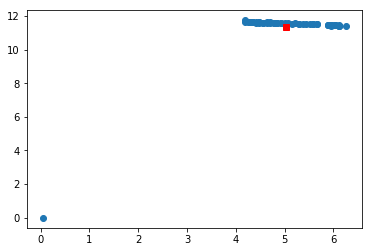

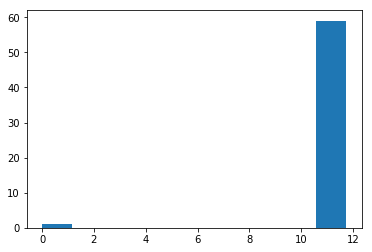

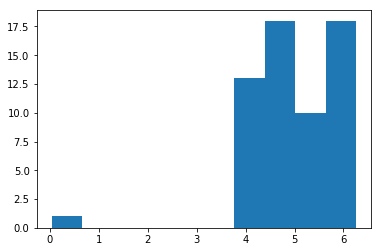

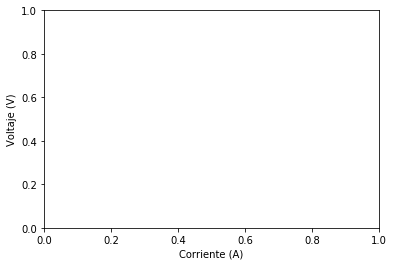

In [126]:
IN_T_4 = np.int_(processEXP4['Temperature(°C)'])
IN_H_4 = np.int_(processEXP4['Humedad(%)'])
IN_V_4 = np.float_(processEXP4['Voltage(V)'])/100
IN_I_4 = np.float_(processEXP4['Current(A)'])/100
plt.scatter(IN_I_4,IN_V_4)
plt.plot(np.mean(IN_I_4),np.mean(IN_V_4),'rs',c='red')
plt.figure()
plt.hist(IN_V_4)
plt.figure()
plt.hist(IN_I_4)
plt.figure()
plt.ylabel('Voltaje (V)')
plt.xlabel('Corriente (A)')
#plt.plot(IN_I,IN_V,c='green')

In [136]:
IN_I_4[1:59]

array([4.18, 4.33, 4.63, 4.7 , 4.92, 5.22, 5.29, 5.59, 5.59, 5.67, 5.89,
       6.04, 6.04, 6.04, 6.04, 5.96, 6.11, 5.96, 6.11, 6.26, 6.11, 5.89,
       6.11, 5.96, 5.89, 5.96, 5.67, 5.52, 5.44, 5.37, 5.15, 5.29, 5.07,
       4.92, 5.  , 4.85, 4.85, 4.78, 4.78, 4.7 , 4.63, 4.55, 4.55, 4.48,
       4.48, 4.33, 4.33, 4.41, 4.48, 4.33, 4.33, 4.41, 4.26, 4.33, 4.26,
       4.33, 4.26, 4.26])

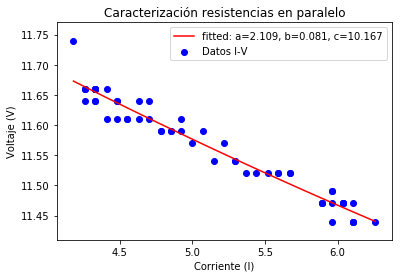

In [142]:
IN_I_41=IN_I_4[1:59]
IN_V_41=IN_V_4[1:59]

popt_04, pcov_04 = curve_fit(func,IN_I_41,IN_V_41)
newx_4 = np.linspace(np.min(IN_I_41), np.max(IN_I_41), 100)
plt.scatter(IN_I_41,IN_V_41,c='blue',label='Datos I-V')
plt.plot(newx_4, func(newx_4, *popt_04), 'r-',label='fitted: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_04))
#popt_03, pcov_03 = curve_fit(func, IN_I, IN_V, bounds=(0, [3., 1., 0.5]))
#plt.plot(IN_I, func(IN_I, *popt_03), 'g--',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_03))
plt.ylabel('Voltaje (V)')
plt.xlabel('Corriente (I)')
plt.title('Caracterización resistencias en paralelo')
plt.legend()
plt.savefig('Solar_incubator_EXP04.png')

In [145]:
np.mean(IN_I)*np.mean(IN_V)

20.294101527777773

## Resumen

In [18]:
print(lista)
arduino.close()
dataADQ = lista.copy()
for i in range(len(dataADQ)):
    dataADQ[i]=dataADQ[i].split(",")
dataADQ=np.array(dataADQ)
for i in range(len(dataADQ)):
    for j in range(len(dataADQ[i])):
        dataADQ[i,j] = re.sub("\D","",dataADQ[i,j])
DATAadqEXP3.update((({'Temperature(°C)':dataADQ[:,0]})))
DATAadqEXP3.update((({'Humedad(%)':dataADQ[:,1]})))
DATAadqEXP3.update((({'Voltage(V)':dataADQ[:,2]})))
DATAadqEXP3.update((({'Current(A)':dataADQ[:,3]})))
DATAadqEXP3

['0,0,12.20,1.52\r\n', '23,44,12.15,1.59\r\n', '23,44,12.13,1.52\r\n', '22,44,12.10,1.52\r\n', '22,44,12.10,1.59\r\n', '22,44,12.10,1.52\r\n', '22,44,12.10,1.59\r\n', '22,44,12.10,1.52\r\n', '22,44,12.08,1.59\r\n', '22,44,12.10,1.67\r\n', '22,45,12.08,1.67\r\n', '23,45,12.08,1.59\r\n', '23,45,12.08,1.67\r\n', '23,45,12.10,1.67\r\n', '23,45,12.08,1.74\r\n', '23,45,12.10,1.67\r\n', '23,45,12.08,1.67\r\n', '23,45,12.10,1.67\r\n', '23,46,12.08,1.67\r\n', '23,46,12.08,1.67\r\n', '23,46,12.08,1.67\r\n', '23,46,12.08,1.67\r\n', '23,46,12.05,1.67\r\n', '23,46,12.05,1.67\r\n', '23,46,12.05,1.67\r\n', '23,46,12.08,1.74\r\n', '23,46,12.05,1.74\r\n', '23,46,12.03,1.67\r\n', '23,46,12.08,1.67\r\n', '23,46,12.05,1.74\r\n', '23,46,12.05,1.74\r\n', '23,46,12.08,1.67\r\n', '23,46,12.08,1.67\r\n', '23,46,12.05,1.67\r\n', '23,46,12.08,1.74\r\n', '23,46,12.05,1.59\r\n', '23,46,12.08,1.74\r\n', '23,46,12.05,1.74\r\n', '23,46,12.08,1.74\r\n', '23,45,12.05,1.67\r\n', '23,45,12.08,1.59\r\n', '23,45,12.08,1.67

,Temperature(°C),Humedad(%),Voltage(V),Current(A)
0,0,0,1220,152
1,23,44,1215,159
2,23,44,1213,152
3,22,44,1210,152
4,22,44,1210,159
5,22,44,1210,152
6,22,44,1210,159
7,22,44,1210,152
8,22,44,1208,159
9,22,44,1210,167


In [64]:
listaEXP3 = ['0,0,12.20,1.52\r\n', '23,44,12.15,1.59\r\n', '23,44,12.13,1.52\r\n', '22,44,12.10,1.52\r\n', '22,44,12.10,1.59\r\n', '22,44,12.10,1.52\r\n', '22,44,12.10,1.59\r\n', '22,44,12.10,1.52\r\n', '22,44,12.08,1.59\r\n', '22,44,12.10,1.67\r\n', '22,45,12.08,1.67\r\n', '23,45,12.08,1.59\r\n', '23,45,12.08,1.67\r\n', '23,45,12.10,1.67\r\n', '23,45,12.08,1.74\r\n', '23,45,12.10,1.67\r\n', '23,45,12.08,1.67\r\n', '23,45,12.10,1.67\r\n', '23,46,12.08,1.67\r\n', '23,46,12.08,1.67\r\n', '23,46,12.08,1.67\r\n', '23,46,12.08,1.67\r\n', '23,46,12.05,1.67\r\n', '23,46,12.05,1.67\r\n', '23,46,12.05,1.67\r\n', '23,46,12.08,1.74\r\n', '23,46,12.05,1.74\r\n', '23,46,12.03,1.67\r\n', '23,46,12.08,1.67\r\n', '23,46,12.05,1.74\r\n', '23,46,12.05,1.74\r\n', '23,46,12.08,1.67\r\n', '23,46,12.08,1.67\r\n', '23,46,12.05,1.67\r\n', '23,46,12.08,1.74\r\n', '23,46,12.05,1.59\r\n', '23,46,12.08,1.74\r\n', '23,46,12.05,1.74\r\n', '23,46,12.08,1.74\r\n', '23,45,12.05,1.67\r\n', '23,45,12.08,1.59\r\n', '23,45,12.08,1.67\r\n', '23,45,12.05,1.81\r\n', '23,45,12.05,1.81\r\n', '23,45,12.05,1.74\r\n', '23,45,12.08,1.74\r\n', '23,45,12.08,1.74\r\n', '23,45,12.05,1.81\r\n', '23,45,12.05,1.67\r\n', '23,45,12.08,1.74\r\n', '23,45,12.05,1.74\r\n', '23,45,12.05,1.74\r\n', '23,45,12.05,1.74\r\n', '23,45,12.05,1.74\r\n', '23,45,12.05,1.74\r\n', '23,45,12.05,1.74\r\n', '23,45,12.08,1.74\r\n', '23,45,12.05,1.67\r\n', '23,45,12.05,1.74\r\n', '23,45,12.03,1.74\r\n']
dataADQnova = listaEXP3.copy()
for i in range(len(dataADQnova)):
    dataADQnova[i]=dataADQnova[i].split(",")
dataADQnova=np.array(dataADQnova)
for i in range(len(dataADQnova)):
    for j in range(len(dataADQnova[i])):
        dataADQnova[i,j] = re.sub("\D","",dataADQnova[i,j])
DATAadqEXP3nova = pd.DataFrame(np.zeros((60,4)),columns=['Temperature(°C)','Humedad(%)','Voltage(V)','Current(A)'])
DATAadqEXP3nova.update((({'Temperature(°C)':dataADQnova[:,0]})))
DATAadqEXP3nova.update((({'Humedad(%)':dataADQnova[:,1]})))
DATAadqEXP3nova.update((({'Voltage(V)':dataADQnova[:,2]})))
DATAadqEXP3nova.update((({'Current(A)':dataADQnova[:,3]})))
DATAadqEXP3nova.to_csv('Solar_Incubator_V_week_Experimento_03_.csv')

In [66]:
processEXP3 = DATAadqEXP3nova.copy()

Text(0.5,0,'Corriente (A)')

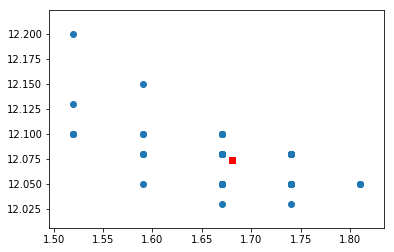

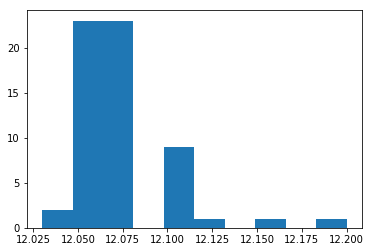

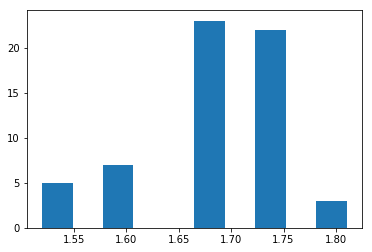

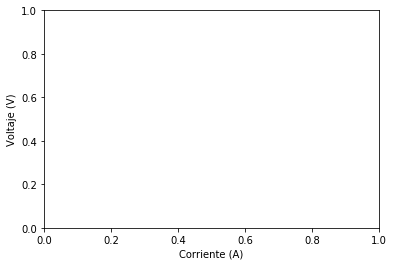

In [80]:
IN_T = np.int_(processEXP3['Temperature(°C)'])
IN_H = np.int_(processEXP3['Humedad(%)'])
IN_V = np.float_(processEXP3['Voltage(V)'])/100
IN_I = np.float_(processEXP3['Current(A)'])/100
plt.scatter(IN_I,IN_V)
plt.plot(np.mean(IN_I),np.mean(IN_V),'rs',c='red')
plt.figure()
plt.hist(IN_V)
plt.figure()
plt.hist(IN_I)
plt.figure()
plt.ylabel('Voltaje (V)')
plt.xlabel('Corriente (A)')
#plt.plot(IN_I,IN_V,c='green')

1.52

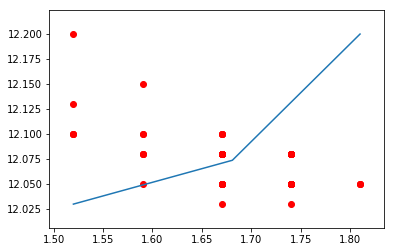

In [99]:
idx = np.unravel_index(np.argsort(IN_V, axis=None), IN_V.shape)
plt.scatter(IN_I[idx],IN_V[idx],c='red')
plt.plot([np.min(IN_I),np.mean(IN_I),np.max(IN_I)],[np.min(IN_V),np.mean(IN_V),np.max(IN_V)])
#plt.Circle(1,2)
np.min(IN_I)

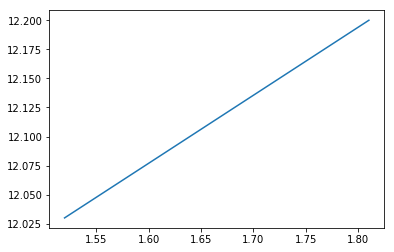

In [97]:
plt.plot([np.min(IN_I),np.max(IN_I)],[np.min(IN_V),np.max(IN_V)])

In [103]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

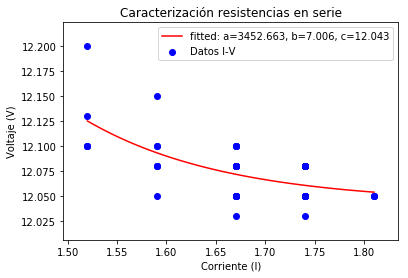

In [141]:
popt_03, pcov_03 = curve_fit(func,IN_I,IN_V)
newx = np.linspace(np.min(IN_I), np.max(IN_I), 100)
plt.scatter(IN_I,IN_V,c='blue',label='Datos I-V')
plt.plot(newx, func(newx, *popt_03), 'r-',label='fitted: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_03))
#popt_03, pcov_03 = curve_fit(func, IN_I, IN_V, bounds=(0, [3., 1., 0.5]))
#plt.plot(IN_I, func(IN_I, *popt_03), 'g--',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_03))
plt.ylabel('Voltaje (V)')
plt.xlabel('Corriente (I)')
plt.title('Caracterización resistencias en serie')
plt.legend()
#plt.savefig('Solar_incubator_EXP03.png')

In [110]:
pcov_03

array([[4.36249904e+08, 8.58365026e+04, 4.36442999e+02],
       [8.58365026e+04, 1.69000242e+01, 8.64184715e-02],
       [4.36442999e+02, 8.64184715e-02, 4.72105864e-04]])

In [18]:
print("Resultados Experimentos 1.")
print(DATAadqEXP1)
print("      ")
print("Resultados Experimentos 2.")
print(DATAadqEXP2)
print("      ")
print("Resultados Experimentos 3.")
print(DATAadqEXP3)

Resultados Experimentos 1.
     Temperature(°C)  Humedad(%)  Voltage(V)  Current(A)
0                0.0         0.0         0.0         0.0
1                0.0         0.0         0.0         0.0
2                0.0         0.0         0.0         0.0
3                0.0         0.0         0.0         0.0
4                0.0         0.0         0.0         0.0
5                0.0         0.0         0.0         0.0
6                0.0         0.0         0.0         0.0
7                0.0         0.0         0.0         0.0
8                0.0         0.0         0.0         0.0
9                0.0         0.0         0.0         0.0
10               0.0         0.0         0.0         0.0
11               0.0         0.0         0.0         0.0
12               0.0         0.0         0.0         0.0
13               0.0         0.0         0.0         0.0
14               0.0         0.0         0.0         0.0
15               0.0         0.0         0.0         0.0
16  

In [ ]:
fin....

### Adquicisión asistida

In [61]:
ADQassist = []
arduino = serial.Serial('COM3', 9600)
while(True):
    ADQassist.append(arduino.readline().decode("utf-8"))
    time.sleep(1)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
arduino.close()
print(ADQassist)

KeyboardInterrupt: 